# Final Capstone - Wish Data Analytics 
#### Christian Rios-Chambi


### This dataset comes from kaggle.com[ https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish ]

### Dataset Description:

#### *Context*
*Studying top products requires more than just product listings. You also need to know what sells well and what does not.*

#### *Content*
*This dataset contains product listings as well as products ratings and sales performance, which you would not find in other datasets.*
*With this, you can finally start to look for correlations and patterns regarding the success of a product and the various components.*

#### *Inspiration*
*How about trying to validate the established idea of human sensitiveness to price drops ? (discounted price compared to original retail_price)*
*You may look for top categories of products so that you know what sells best*
*Do bad products sell ? How about the relationship between the quality of a product (ratings) and its success ? Does the price factor into this ?*

#### *Collection Methodology*
*The data comes from the Wish platform.
Basically, the products listed in the dataset are those that would appear if you type "summer" in the search field of the platform.*

*You can browse the Wish website or app to get a feel of the type of information you can get from there and how they are presented. This might give you some ideas and a better understanding.*

*If you are confused about some columns, you can either look at the column descriptions, browse the Wish website/app, or you can ask in the comments.*

*The data was scraped with french as settings (hence the presence of some non-ascii latin characters such as « é » and « à ») in the title column.*


In [1]:
#libraries and settings used for this analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
import pandas_profiling
import warnings
import collections
from scipy import stats
from sklearn.model_selection import train_test_split
from statsmodels.graphics.gofplots import qqplot
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.style.use('fivethirtyeight') #plot style
sns.set_style("whitegrid")

warnings.filterwarnings("ignore")

In [3]:
#import data files
wish = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
cat = pd.read_csv('unique-categories.csv')
sort_cat = pd.read_csv('unique-categories.sorted-by-count.csv')

# Exploratory Data Analysis 
*Summer Products with Rating and Performance*

In [4]:
#how many records are we dealing with?
wish.shape

(1573, 43)

In [5]:
cat.shape

(2620, 1)

In [6]:
sort_cat.shape

(2620, 2)

In [7]:
wish.head(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,10.0,1.0,9.0,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,50,Livraison standard,4,0,34,50,1.0,Quantité limitée !,CN,zgrdejia,zgrdejia,(568 notes),568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,1118.0,644.0,1077.0,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,50,Livraison standard,2,0,41,50,1.0,Quantité limitée !,CN,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,2.0,0.0,3.0,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,1,Livraison standard,3,0,36,50,1.0,Quantité limitée !,CN,hxt520,hxt520,86 % avis positifs (295 notes),295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,87.0,42.0,36.0,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,50,Livraison standard,2,0,41,50,NaN,NaN,CN,allenfan,allenfan,"(23,832 notes)",23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,2.0,2.0,6.0,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,Livraison standard,1,0,35,50,1.0,Quantité limitée !,CN,youngpeopleshop,happyhorses,"85 % avis positifs (14,482 notes)",14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [8]:
wish.tail(5)

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_title,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
1568,Nouvelle Mode Femmes Bohême Pissenlit Imprimer...,New Fashion Women Bohemia Dandelion Print Tee ...,6.0,9,EUR,10000,1,4.08,1367,722.0,293.0,185.0,77.0,90.0,0,0,0,0,"bohemia,Plus Size,dandelionfloralprinted,short...",navyblue,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,cxuelin99126,cxuelin99126,"90 % avis positifs (5,316 notes)",5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 couleurs femmes shorts d'été lacent ceintur...,10 Color Women Summer Shorts Lace Up Elastic W...,2.0,56,EUR,100,1,3.07,28,11.0,3.0,1.0,3.0,10.0,0,0,0,0,"Summer,Panties,Elastic,Lace,Casual pants,casua...",lightblue,S,2,Livraison standard,1,0,26,50,1.0,Quantité limitée !,CN,sell best quality goods,sellbestqualitygoods,"(4,435 notes)",4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,Nouveautés Hommes Siwmwear Beach-Shorts Hommes...,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.0,19,EUR,100,0,3.71,59,24.0,15.0,8.0,3.0,9.0,0,0,0,0,"runningshort,Beach Shorts,beachpant,menbeachsh...",white,SIZE S,15,Livraison standard,2,0,11,50,NaN,NaN,CN,shixueying,shixueying,86 % avis positifs (210 notes),210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Mode femmes d'été sans manches robes col en V ...,Fashion Women Summer Sleeveless Dresses V Neck...,13.0,11,EUR,100,0,2.50,2,0.0,1.0,0.0,0.0,1.0,0,0,0,0,"Summer,fashion women,Fashion,Lace,Dresses,Dres...",white,Size S.,36,Livraison standard,3,0,29,50,NaN,NaN,CN,modai,modai,77 % avis positifs (31 notes),31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08
1572,Pantalon de yoga pour femmes à la mode Slim Fi...,Fashion Women Yoga Pants Slim Fit Fitness Runn...,7.0,6,EUR,100,1,4.07,14,8.0,3.0,1.0,0.0,2.0,0,0,0,0,"Summer,Leggings,slim,Yoga,pants,Slim Fit,Women...",red,S,50,Livraison standard,2,0,41,50,NaN,NaN,CN,AISHOPPINGMALL,aishoppingmall,"90 % avis positifs (7,023 notes)",7023,4.235939,5a409cf87b584e7951b2e25f,0,NaN,https://www.wish.com/c/5e857321f53c3d2d8f25e7ed,https://contestimg.wish.com/api/webimage/5e857...,5e857321f53c3d2d8f25e7ed,summer,2020-08


In [9]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [10]:
wish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [11]:
pd.options.display.float_format = "{:.2f}".format
wish.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1573.00,8.33,3.93,1.00,5.81,8.00,11.00,49.00
retail_price,1573.00,23.29,30.36,1.00,7.00,10.00,26.00,252.00
units_sold,1573.00,4339.01,9356.54,1.00,100.00,1000.00,5000.00,100000.00
uses_ad_boosts,1573.00,0.43,0.50,0.00,0.00,0.00,1.00,1.00
rating,1573.00,3.82,0.52,1.00,3.55,3.85,4.11,5.00
rating_count,1573.00,889.66,1983.93,0.00,24.00,150.00,855.00,20744.00
rating_five_count,1528.00,442.26,980.20,0.00,12.00,79.00,413.50,11548.00
rating_four_count,1528.00,179.60,400.52,0.00,5.00,31.50,168.25,4152.00
rating_three_count,1528.00,134.55,311.69,0.00,4.00,24.00,129.25,3658.00
rating_two_count,1528.00,63.71,151.34,0.00,2.00,11.00,62.00,2003.00


In [12]:
# lets check if there are any nulls in these columns. Sorted descending style.
wish.isnull().sum().sort_values(ascending=False)

merchant_profile_picture        1347
has_urgency_banner              1100
urgency_text                    1100
rating_one_count                  45
rating_two_count                  45
rating_three_count                45
rating_four_count                 45
rating_five_count                 45
product_color                     41
origin_country                    17
product_variation_size_id         14
merchant_name                      4
merchant_info_subtitle             1
crawl_month                        0
badges_count                       0
rating_count                       0
badge_product_quality              0
rating                             0
uses_ad_boosts                     0
units_sold                         0
currency_buyer                     0
retail_price                       0
price                              0
title_orig                         0
badge_local_product                0
product_variation_inventory        0
badge_fast_shipping                0
m

*I have null values in my merchant_profile_picture (1347), has_urgency_banner (1100), urgency_text (1100), rating_one_count (45), rating_two_count (45), rating_three_count (45), rating_four_count (45), rating_five_count (45), product_color (41), origin_country (17), product_variation_size_id (14), merchant_name (4) and merchant_info_subtitle (1) columns.*


## The wish dataframe is the main dataset. There are 1573 different products and 43 unique columns. 

#### Here is a summary breakdown for each column:

**'title'** = Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation. {object}

**'title_orig'** = Original english title of the product. {object}

**'price'** = price you would pay to buy the product. {float64}

**'retail_price'** = reference price for similar articles on the market, or in other stores/places. Used by the seller to indicate a regular value or. {float64}

*'currency_buyer' = currency of the prices. 1 unique value. {object} {delete}*

**'units_sold'** = Number of units sold. Lower bound approximation by steps. On the Wish website, the units solds is shown as a string '20,000 +'. {int64}

**'uses_ad_boosts'** = Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever).A boolen column with '1' meaning seller used Wish's paid 'Product Boost' service and '0' meaning that they did. Product Boost is the native advertising platform of the Wish Marketplace. Wish statement : " You can run targeted campaigns on your products from Wish, to maximize your conversions and generate higher revenue. As Wish understands its buyers, its native ad system suggests items to customers based on their previous purchases, so the conversion rate is always higher." {int64}

**'rating'** = Mean product rating. {float64}

**'rating_count'** = Total number of ratings of the product. {int64}

**'rating_five_count'** = The total amount of five star ratings the product recived. {float64}

**'rating_four_count'** = The total amount of four four ratings the product recived. {float64}

**'rating_three_count'** = The total amount of three star ratings the product recived. {float64}

**'rating_two_count'** = The total amount of two star ratings the product recived. {float64}

**'rating_one_count'** = The total amount of two star ratings the product recived. {float64}

**'badges_count'** = Number of badges the product or the seller have. {int64}

**'badge_local_product'** = A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else). 

**'badge_product_quality'** = Badge awarded when many buyers consistently gave good evaluations 1 means Yes, has the badge.

**'badge_fast_shipping'** = Badge awarded when this product's order is consistently shipped rapidly

**'tags'**= tags set by the seller. 

**'product_color'** = Product's main color.

**'product_variation_size_id'** = One of the available size variation for this product.

*'product_variation_inventory' = Inventory the seller has. Max allowed quantity is 50.*

*'shipping_option_name' = french shipping quality option*

*'shipping_option_price' = shipping price*

*'shipping_is_express' = whether the shipping is express or not. 1 for True*

**'countries_shipped_to'** = Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to

*'inventory_total' = Total inventory for all the product's variations (size/color variations for instance)*

**'has_urgency_banner'** = whether there was an urgency banner with an urgency

**'urgency_text'** = A text banner that appear over some products in the search results.

**'origin_country'** = country where the products are coming from

**'merchant_title'** = Merchant's displayed name (show in the UI as the seller's shop name)

*'merchant_name' = Merchant's canonical name. A name not shown publicly. Used by the website under the hood as a canonical name.*

**'merchant_info_subtitle'** = The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed). The website shows this to the user.

**'merchant_rating_count'** = Number of ratings of this seller

**'merchant_rating'** = merchant's rating

**'merchant_id'** = merchant unique id

**'merchant_has_profile_picture'** = Convenience boolean that says whether there is a `merchant_profile_picture` url.

*'product_url' = url to the product page. You may need to login to access it*

**'product_picture'** = actual picture of the product

**'product_id'** = product identifier. You can use this key to remove duplicate entries if you're not interested in studying them.

*'theme' = the search term used in the search bar of the website to get these search results.*

*'crawl_month' = meta: for info only.*

## Here is a code to create a quick statistical summery of each dataset. The html page summary reports are included in repo.

In [13]:
# report = pandas_profiling.ProfileReport(wish)
# report.to_file("wish_report.html")
# report_cat = pandas_profiling.ProfileReport(cat)
# report_cat.to_file("cat_report.html")

# title 
*Title for localized for european countries. May be the same as title_orig if the seller did not offer a translation. {object}*

In [14]:
wish['title'].head(5)

0    2020 Summer Vintage Flamingo Print  Pajamas Se...
1    SSHOUSE Summer Casual Sleeveless Soirée Party ...
2    2020 Nouvelle Arrivée Femmes Printemps et Été ...
3    Hot Summer Cool T-shirt pour les femmes Mode T...
4    Femmes Shorts d'été à lacets taille élastique ...
Name: title, dtype: object

# title_orig 
*Original english title of the product. {object}*

In [15]:
wish['title_orig'].head(5)

0    2020 Summer Vintage Flamingo Print  Pajamas Se...
1     Women's Casual Summer Sleeveless Sexy Mini Dress
2    2020 New Arrival Women Spring and Summer Beach...
3    Hot Summer Cool T Shirt for Women Fashion Tops...
4    Women Summer Shorts Lace Up Elastic Waistband ...
Name: title_orig, dtype: object

# Price 
*Price you would pay to buy the product. {float64}*

In [16]:
wish['price'].describe()

count   1573.00
mean       8.33
std        3.93
min        1.00
25%        5.81
50%        8.00
75%       11.00
max       49.00
Name: price, dtype: float64

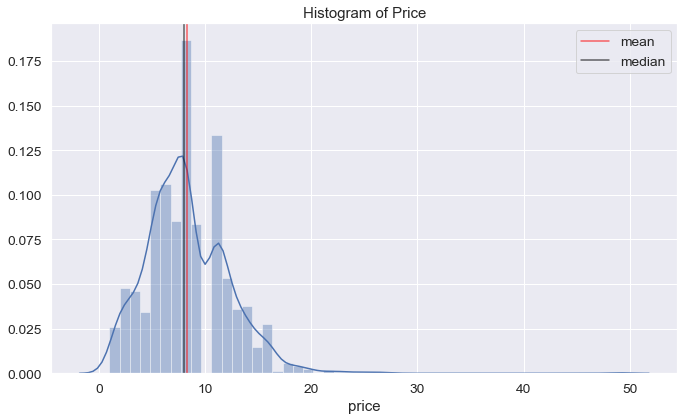

In [17]:
# Visualization of price
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=1.25)


mean=wish['price'].mean()
median=wish['price'].median()

sns.distplot(wish.price,bins=50).set_title('Histogram of Price')
plt.axvline(mean,0, 1, color = 'red', label='mean', alpha = 0.6)
plt.axvline(median,0, 1, color = 'black', label='median', alpha = 0.6)



plt.legend()

8.0
8.325371900826434


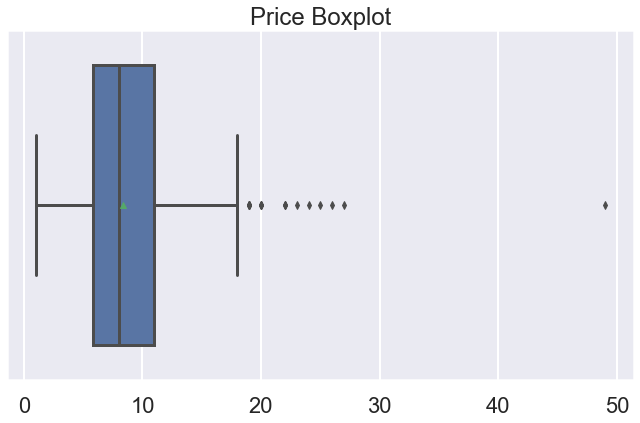

In [18]:
sns.set_context('poster')

x = wish['price'].values

# 3. add boxplot 
sns.boxplot(x, showmeans = True).set_title('Price Boxplot')

# The line in the middle signifies the median
# Check your median value with python 
print(wish['price'].median())
# Check your median value with python
print(wish['price'].mean())

[Text(0.5, 0, '')]

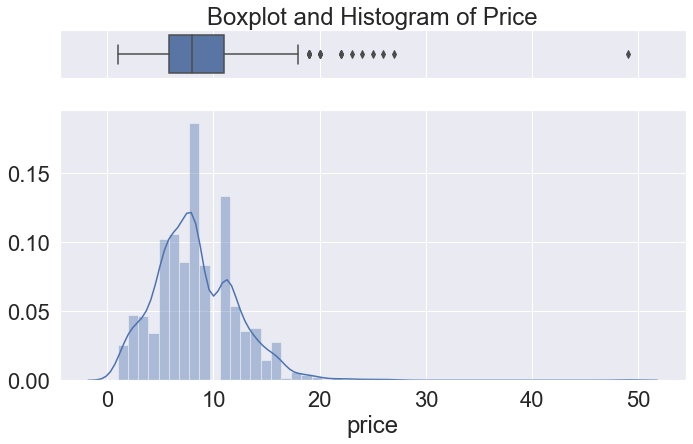

In [19]:
# Cut the window in 2 parts
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=2)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(wish["price"], ax=ax_box).set_title('Boxplot and Histogram of Price')
sns.distplot(wish["price"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

The median value of the prices is 8 euros and the mean is 8.33 euros. The price data seems to be normally distributed. There are a couple of outliers. The outliers seem to be located between 19 to 50 euros. 

# Retail Price 
*Reference price for similar articles on the market, or in other stores/places. Used by the seller to indicate a regular value or. {float64}*

In [20]:
wish['retail_price'].describe()

count   1573.00
mean      23.29
std       30.36
min        1.00
25%        7.00
50%       10.00
75%       26.00
max      252.00
Name: retail_price, dtype: float64

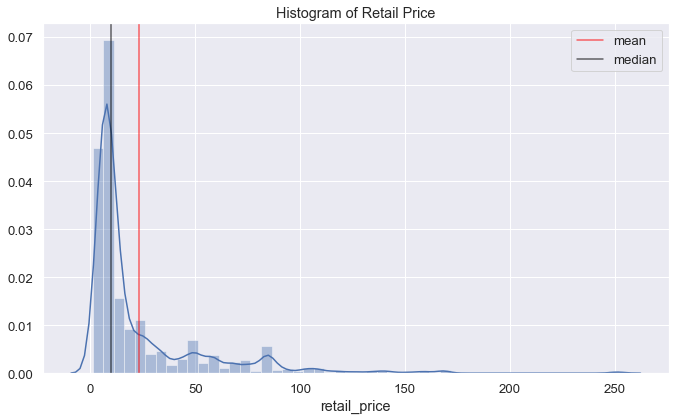

In [21]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=1.2)

mean=wish['retail_price'].mean()
median=wish['retail_price'].median()

sns.distplot(wish.retail_price,bins=50).set_title('Histogram of Retail Price')
plt.axvline(mean,0, 1, color = 'red', label='mean', alpha=0.6)
plt.axvline(median,0, 1, color = 'black', label='median', alpha=0.6)

plt.legend()

10.0
23.28862047043865


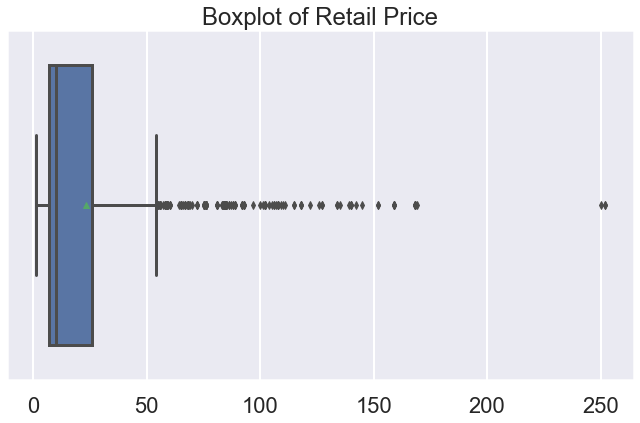

In [22]:
sns.set_context('poster')

x = wish['retail_price'].values

# 3. add boxplot 
sns.boxplot(x, showmeans = True).set_title('Boxplot of Retail Price')

# The line in the middle signifies the median
# Check your median value with python 
print(wish['retail_price'].median())
# Check your median value with python
print(wish['retail_price'].mean())

[Text(0.5, 0, '')]

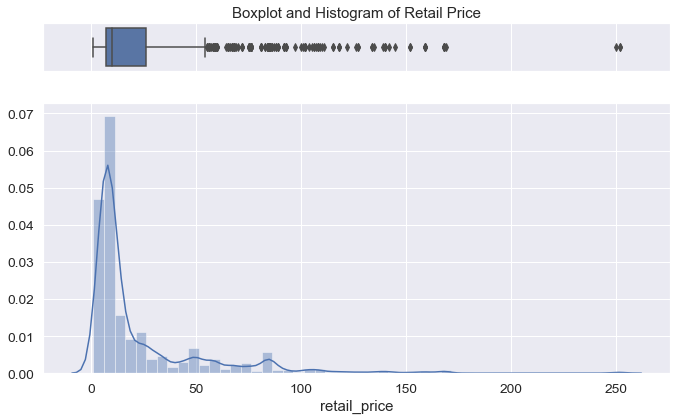

In [23]:
# Cut the window in 2 parts
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=1.25)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(wish["retail_price"], ax=ax_box).set_title('Boxplot and Histogram of Retail Price')
sns.distplot(wish["retail_price"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# Currency Buyer
*The currency of the prices. 1 unique value. {object} {delete}*

In [24]:
# checking the type of currency used. its all in euros. flagged for deletion.
wish['currency_buyer'].value_counts()

EUR    1573
Name: currency_buyer, dtype: int64

In [25]:
del wish['currency_buyer']

In [26]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'product_variation_inventory',
       'shipping_option_name', 'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

# Units Sold
*Number of units sold. Lower bound approximation by steps. On the Wish website, the units solds is shown as a string '20,000 +'. {int64}*

In [27]:
wish['units_sold'].describe()

count     1573.00
mean      4339.01
std       9356.54
min          1.00
25%        100.00
50%       1000.00
75%       5000.00
max     100000.00
Name: units_sold, dtype: float64

*Units sold is not continuous. The units sold is shown on the website like "100+ units sold".* 

In [28]:
wish['units_sold'].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

In [29]:
# Function to aggregate the amount sold < 10
def agg_sold(item):
    if item < 10:
        return 10
    else:
        return item

In [30]:
#applying function
wish['units_sold'] = wish['units_sold'].apply(agg_sold)

wish['units_sold'].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: units_sold, dtype: int64

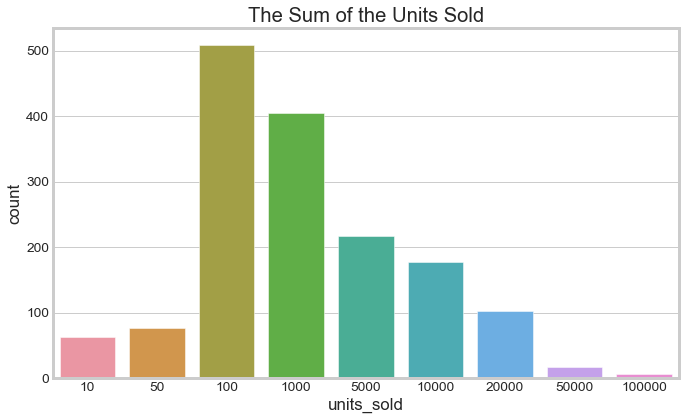

In [31]:
plt.style.use('fivethirtyeight')
sns.set_style("whitegrid")

ax = sns.countplot('units_sold',data=wish)
ax.set_title('The Sum of the Units Sold')
plt.show()

# uses_ad_boosts
*Whether the seller paid to boost his product within the platform (highlighting, better placement or whatever).A boolen column with '1' meaning seller used Wish's paid 'Product Boost' service and '0' meaning that they did. Product Boost is the native advertising platform of the Wish Marketplace. Wish statement: " *You can run targeted campaigns on your products from Wish, to maximize your conversions and generate higher revenue. As Wish understands its buyers, its native ad system suggests items to customers based on their previous purchases, so the conversion rate is always higher." {int64}*

In [32]:
# whether or not the product uses ad product boosts. '1' for yes and '0' for no.
wish['uses_ad_boosts'].value_counts()

0    892
1    681
Name: uses_ad_boosts, dtype: int64

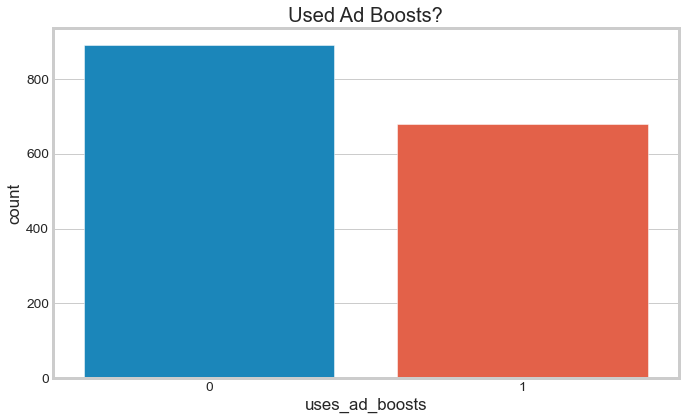

In [33]:
# Lets visualize the records relating to ad boosts.
ax = sns.countplot(x="uses_ad_boosts", data=wish).set_title('Used Ad Boosts?')

# Rating
*Mean product rating. {float64}*

In [34]:
wish['rating'].describe()

count   1573.00
mean       3.82
std        0.52
min        1.00
25%        3.55
50%        3.85
75%        4.11
max        5.00
Name: rating, dtype: float64

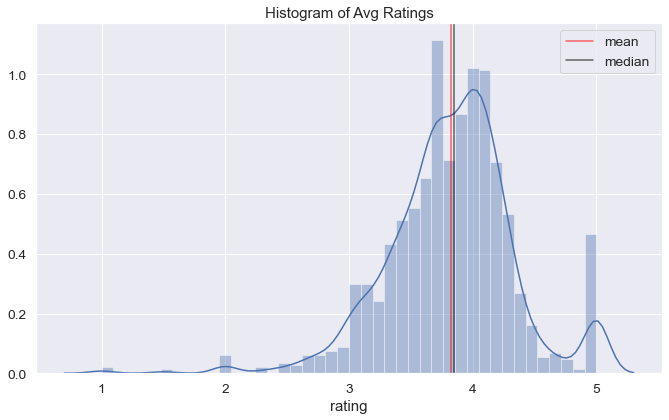

In [35]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=1.25)

mean=wish['rating'].mean()
median=wish['rating'].median()

sns.distplot(wish.rating).set_title('Histogram of Avg Ratings')
plt.axvline(mean,0, 1, color = 'red', label='mean',alpha = 0.6)
plt.axvline(median,0, 1, color = 'black', label='median',alpha = 0.6)

plt.legend()

3.85
3.8208963763509174


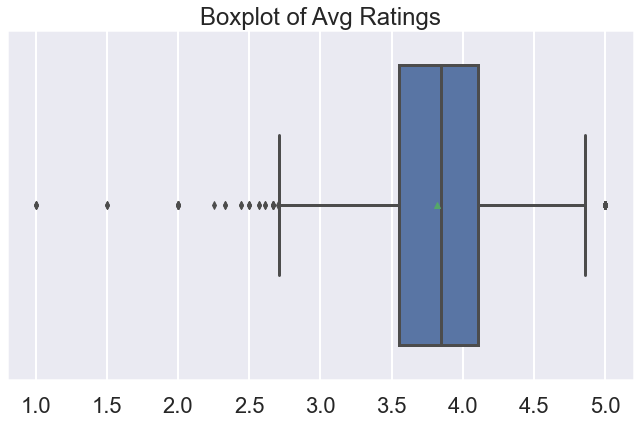

In [36]:
sns.set_context('poster')

x = wish['rating'].values

# 3. add boxplot 
sns.boxplot(x, showmeans = True).set_title('Boxplot of Avg Ratings')

# The line in the middle signifies the median
# Check your median value with python 
print(wish['rating'].median())
# Check your median value with python
print(wish['rating'].mean())

[Text(0.5, 0, '')]

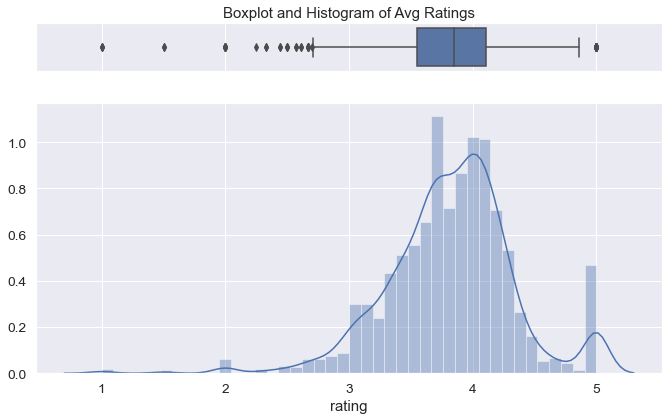

In [37]:
# Cut the window in 2 parts
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=1.25)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(wish["rating"], ax=ax_box).set_title('Boxplot and Histogram of Avg Ratings')
sns.distplot(wish["rating"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# Rating Count
*Total number of ratings of the product. {int64}*

In [38]:
wish['rating_count'].describe()

count    1573.00
mean      889.66
std      1983.93
min         0.00
25%        24.00
50%       150.00
75%       855.00
max     20744.00
Name: rating_count, dtype: float64

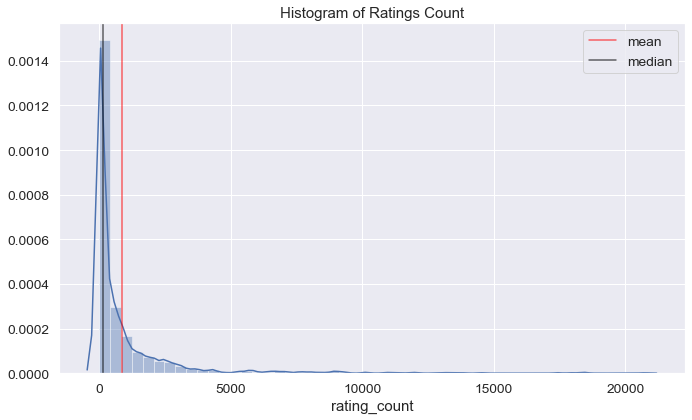

In [39]:
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=1.25)

mean=wish['rating_count'].mean()
median=wish['rating_count'].median()

sns.distplot(wish.rating_count).set_title('Histogram of Ratings Count')
plt.axvline(mean,0, 1, color = 'red', label='mean',alpha = 0.6)
plt.axvline(median,0, 1, color = 'black', label='median',alpha = 0.6)

plt.legend()

150.0
889.659249841068


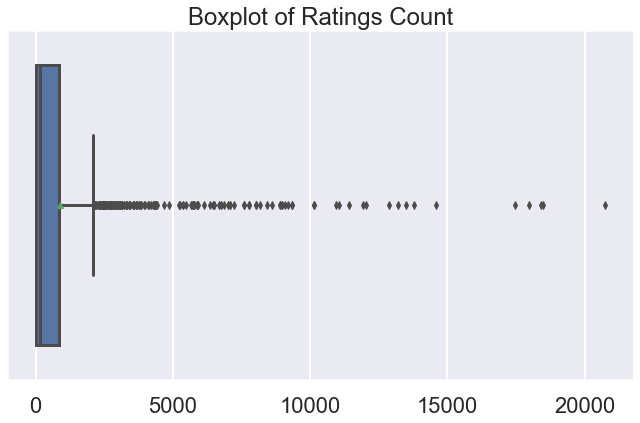

In [40]:
sns.set_context('poster')

x = wish['rating_count'].values

# 3. add boxplot 
sns.boxplot(x, showmeans = True).set_title('Boxplot of Ratings Count')
# The line in the middle signifies the median
# Check your median value with python 
print(wish['rating_count'].median())
# Check your median value with python
print(wish['rating_count'].mean())

[Text(0.5, 0, '')]

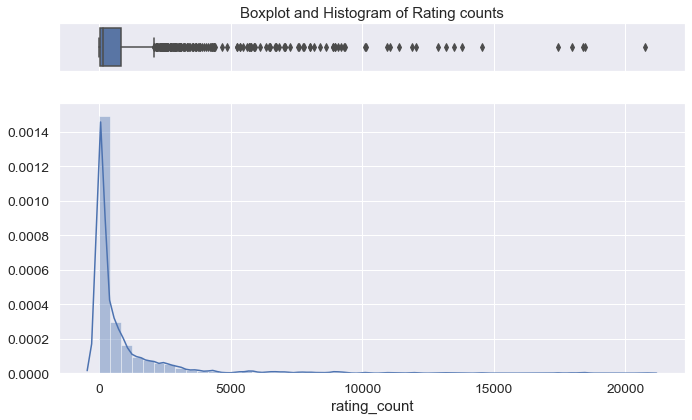

In [41]:
# Cut the window in 2 parts
sns.set(rc={'figure.figsize': (10, 6)})
sns.set(font_scale=1.25)

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
sns.boxplot(wish["rating_count"], ax=ax_box).set_title('Boxplot and Histogram of Rating counts')
sns.distplot(wish["rating_count"], ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

# Rating Five Count
*The total amount of five star ratings the product recived. {float64}*

In [42]:
wish['rating_five_count'].describe()

count    1528.00
mean      442.26
std       980.20
min         0.00
25%        12.00
50%        79.00
75%       413.50
max     11548.00
Name: rating_five_count, dtype: float64

In [43]:
wish['rating_five_count'] = wish['rating_five_count'].replace(np.nan, 79.00)

In [44]:
wish['rating_five_count'].describe()

count    1573.00
mean      431.87
std       967.97
min         0.00
25%        13.00
50%        79.00
75%       394.00
max     11548.00
Name: rating_five_count, dtype: float64

# Rating Four Count
*The total amount of four star ratings the product recived. {float64}*

In [45]:
wish['rating_four_count'].describe()

count   1528.00
mean     179.60
std      400.52
min        0.00
25%        5.00
50%       31.50
75%      168.25
max     4152.00
Name: rating_four_count, dtype: float64

In [46]:
wish['rating_four_count'] = wish['rating_four_count'].replace(np.nan, 31.50)

In [47]:
wish['rating_four_count'].describe()

count   1573.00
mean     175.36
std      395.51
min        0.00
25%        5.00
50%       31.50
75%      163.00
max     4152.00
Name: rating_four_count, dtype: float64

# Rating Three Count
*The total amount of three star ratings the product recived. {float64}*

In [48]:
wish['rating_three_count'].describe()

count   1528.00
mean     134.55
std      311.69
min        0.00
25%        4.00
50%       24.00
75%      129.25
max     3658.00
Name: rating_three_count, dtype: float64

In [49]:
wish['rating_three_count'] = wish['rating_three_count'].replace(np.nan, 24.00)

In [50]:
wish['rating_three_count'].describe()

count   1573.00
mean     131.39
std      307.75
min        0.00
25%        4.00
50%       24.00
75%      121.00
max     3658.00
Name: rating_three_count, dtype: float64

# Rating Two Count
*The total amount of two star ratings the product recived. {float64}*

In [51]:
wish['rating_two_count'].describe()

count   1528.00
mean      63.71
std      151.34
min        0.00
25%        2.00
50%       11.00
75%       62.00
max     2003.00
Name: rating_two_count, dtype: float64

In [52]:
wish['rating_two_count'] = wish['rating_two_count'].replace(np.nan, 11.00)

In [53]:
wish['rating_two_count'].describe()

count   1573.00
mean      62.20
std      149.42
min        0.00
25%        2.00
50%       11.00
75%       59.00
max     2003.00
Name: rating_two_count, dtype: float64

# Rating One Count
*The total amount of one star ratings the product recived. {float64}*

In [54]:
wish['rating_one_count'].describe()

count   1528.00
mean      95.74
std      214.08
min        0.00
25%        4.00
50%       20.00
75%       94.00
max     2789.00
Name: rating_one_count, dtype: float64

In [55]:
wish['rating_one_count'] = wish['rating_one_count'].replace(np.nan, 20.00)

In [56]:
wish['rating_one_count'].describe()

count   1573.00
mean      93.57
std      211.37
min        0.00
25%        4.00
50%       20.00
75%       90.00
max     2789.00
Name: rating_one_count, dtype: float64

# Badges Count
*Number of badges the product or the seller have. {int64}*

In [57]:
wish['badges_count'].describe()

count   1573.00
mean       0.11
std        0.34
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        3.00
Name: badges_count, dtype: float64

In [58]:
wish['badges_count'].value_counts()

0    1422
1     138
2      11
3       2
Name: badges_count, dtype: int64

# Badge Local Product
*A badge that denotes the product is a local product. Conditions may vary (being produced locally, or something else).*

In [59]:
wish['badge_local_product'].value_counts()

0    1544
1      29
Name: badge_local_product, dtype: int64

# Badge Product Quality
*Badge awarded when many buyers consistently gave good evaluations. 1 means the merchant has the badge.*

In [60]:
wish['badge_product_quality'].value_counts()

0    1456
1     117
Name: badge_product_quality, dtype: int64

# Badge Fast Shipping
*Badge awarded when this product's order is consistently shipped rapidly*

In [61]:
wish['badge_fast_shipping'].value_counts()

0    1553
1      20
Name: badge_fast_shipping, dtype: int64

# Tags
*tags set by the seller.*

In [62]:
wish['tags'].head(10)

0    Summer,Fashion,womenunderwearsuit,printedpajam...
1    Mini,womens dresses,Summer,Patchwork,fashion d...
2    Summer,cardigan,women beachwear,chiffon,Sexy w...
3    Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4    Summer,Plus Size,Lace,Casual pants,Bottom,pant...
5    Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...
6    blouse,Women,lace t shirt,summer t-shirts,Lace...
7    Jeans,Fashion,tunic,Shirt,Summer,Dress,Denim,s...
8    slim dress,summer dress,womenshortsleevedre,Sl...
9    blouse,Summer,Plus Size,Floral print,Necks,Sle...
Name: tags, dtype: object

# Popular product tags in Summer - 2020

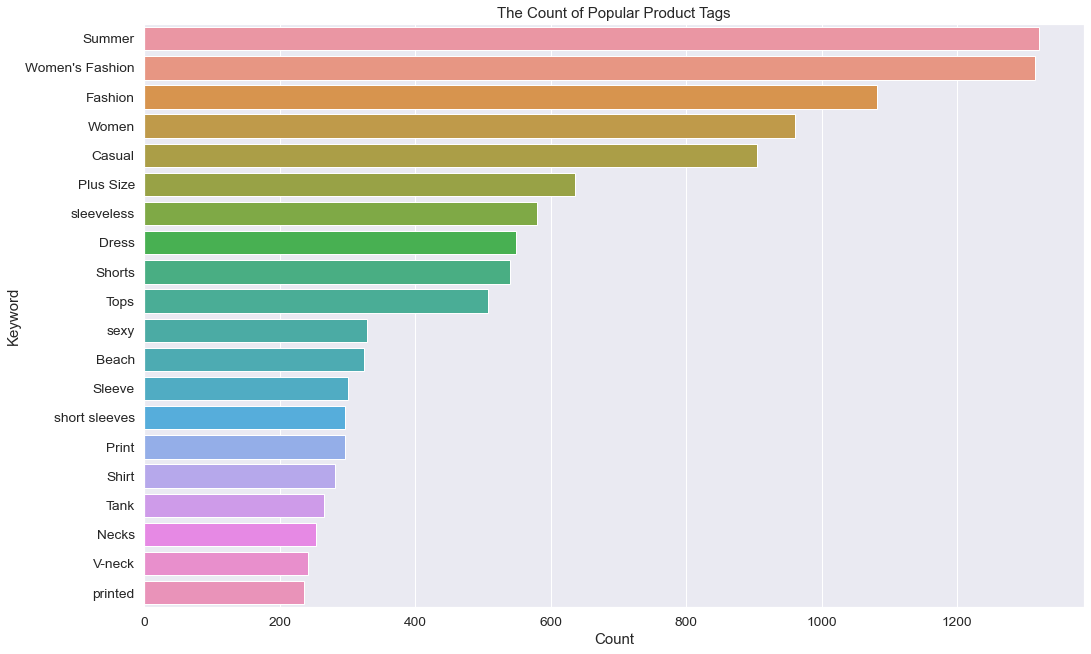

In [63]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'count',
            y = 'keyword',
            data = sort_cat.iloc[:20],
            ax = ax)
ax.set(xlabel='Count', ylabel='Keyword')
ax.set_title('The Count of Popular Product Tags')

plt.xticks(rotation=0, ha='center')
plt.show()

*Now let's create a column which indicates how many popular tags contained on a specific product tag*

In [64]:
pop_tags = sort_cat.iloc[:10]['keyword'].tolist()

def check_tag_quality(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    
    common_elements = np.intersect1d(pop_tags, prod_tags)
    return len(common_elements) / len(pop_tags)
    
wish['tag_quality'] = wish['tags'].apply(check_tag_quality)

In [65]:
wish['tag_quality'].describe()

count   1573.00
mean       0.53
std        0.19
min        0.00
25%        0.40
50%        0.60
75%        0.70
max        1.00
Name: tag_quality, dtype: float64

In [66]:
wish['tag_quality'].value_counts()

0.70    314
0.60    300
0.50    291
0.40    236
0.80    153
0.30    137
0.20     72
0.10     36
0.90     16
0.00     14
1.00      4
Name: tag_quality, dtype: int64

*Check the number of tags include in the product*

In [67]:
def tag_count(tags):
    tag_str = tags
    prod_tags = tag_str.split(',')
    return len(prod_tags)
    
wish['tag_count'] = wish['tags'].apply(tag_count)

In [68]:
wish['tag_count'].describe()

count   1573.00
mean      17.39
std        4.07
min        8.00
25%       14.00
50%       17.00
75%       20.00
max       41.00
Name: tag_count, dtype: float64

In [69]:
wish['tag_count'].value_counts()

17    168
16    165
18    153
15    141
19    139
13    137
14    135
20     98
21     90
12     64
23     48
22     45
11     38
24     36
26     29
25     23
10     22
27     11
29      8
28      7
8       3
30      3
37      2
31      2
34      2
9       2
33      1
41      1
Name: tag_count, dtype: int64

# Product Color
*The product's main color.*

In [70]:
wish['product_color'].value_counts().head(10)

black        302
white        254
yellow       105
pink          99
blue          99
red           93
green         90
grey          71
purple        53
armygreen     31
Name: product_color, dtype: int64

In [71]:
wish['product_color'].describe()

count      1532
unique      101
top       black
freq        302
Name: product_color, dtype: object

In [72]:
pr_colr = wish['product_color'].value_counts()
pr_colr[pr_colr > 2]

black               302
white               254
yellow              105
pink                 99
blue                 99
red                  93
green                90
grey                 71
purple               53
armygreen            31
winered              28
navyblue             28
orange               27
multicolor           20
beige                14
lightblue            12
khaki                12
gray                 11
white & green        10
rosered               8
skyblue               8
brown                 7
coffee                7
darkblue              6
floral                5
rose                  5
black & green         4
fluorescentgreen      4
navy                  4
lightpink             4
leopard               4
camouflage            3
White                 3
black & white         3
Black                 3
lightgreen            3
orange-red            3
Name: product_color, dtype: int64

In [73]:
wish['product_color'] = wish['product_color'].replace('Black', 'black')
wish['product_color'] = wish['product_color'].replace('White', 'white')

wish['product_color'] = wish['product_color'].replace('navyblue', 'blue')
wish['product_color'] = wish['product_color'].replace('lightblue', 'blue')
wish['product_color'] = wish['product_color'].replace('skyblue', 'blue')
wish['product_color'] = wish['product_color'].replace('darkblue', 'blue')
wish['product_color'] = wish['product_color'].replace('navy', 'blue')


wish['product_color'] = wish['product_color'].replace('winered', 'red')
wish['product_color'] = wish['product_color'].replace('rosered', 'red')
wish['product_color'] = wish['product_color'].replace('rose', 'red')
wish['product_color'] = wish['product_color'].replace('orange-red', 'red')

wish['product_color'] = wish['product_color'].replace('lightpink', 'pink')

wish['product_color'] = wish['product_color'].replace('armygreen', 'green')
wish['product_color'] = wish['product_color'].replace('khaki', 'green')
wish['product_color'] = wish['product_color'].replace('lightgreen', 'green')
wish['product_color'] = wish['product_color'].replace('fluorescentgreen', 'green')

wish['product_color'] = wish['product_color'].replace('gray', 'grey')

wish['product_color'] = wish['product_color'].replace('coffee', 'brown')


wish['product_color'] = wish['product_color'].replace('multicolor', 'other')
wish['product_color'] = wish['product_color'].replace('floral', 'other')
wish['product_color'] = wish['product_color'].replace('leopard', 'other')
wish['product_color'] = wish['product_color'].replace('camouflage', 'other')

wish['product_color'] = wish['product_color'].replace('white & green', 'dual')
wish['product_color'] = wish['product_color'].replace('black & green', 'dual')
wish['product_color'] = wish['product_color'].replace('black & white', 'dual')
wish['product_color'] = wish['product_color'].replace('camouflage', 'other')

    
wish['product_color'] = wish['product_color'].replace(np.nan, 'other')

pr_colr = wish['product_color'].value_counts()
pr_colr[pr_colr > 2]

black     305
white     257
blue      157
green     140
red       137
yellow    105
pink      103
grey       82
other      73
purple     53
orange     27
dual       17
brown      14
beige      14
Name: product_color, dtype: int64

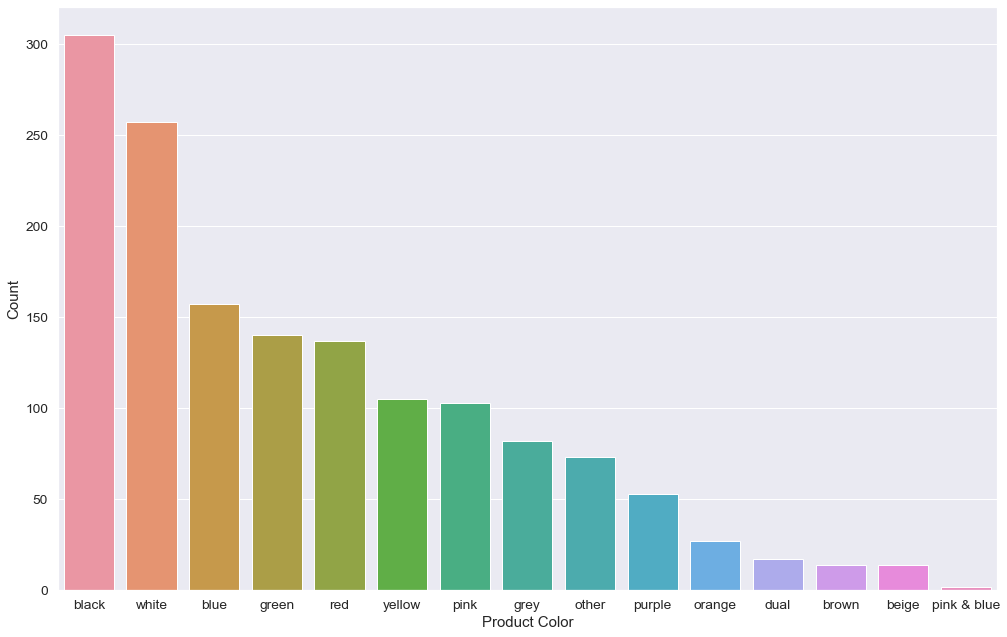

In [74]:
# Show Most popular colors
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color', 
              data = wish,
              order = wish['product_color'].value_counts().iloc[:15].index,
              ax = ax)
ax.set(xlabel='Product Color', ylabel='Count')

plt.show()

# Product Variation Size Id
*One of the available size variation for this product.*

In [75]:
wish['product_variation_size_id'].value_counts().head(10)

S       641
XS      356
M       200
XXS     100
L        49
S.       18
XL       17
XXL      15
XXXS      6
4XL       5
Name: product_variation_size_id, dtype: int64

In [76]:
wish['product_variation_size_id'].describe()

count     1559
unique     106
top          S
freq       641
Name: product_variation_size_id, dtype: object

In [77]:
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('S.', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('XS.', 'XS')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('M.', 'M')

wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size S', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size-XS', 'XS')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('SIZE XS', 'XS')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size-S', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size4XL', 'XXXL')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('size S', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size M', 'M')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size -XXS', 'XXS')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('SIZE-XXS', 'XXS')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size S.', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('s', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('SizeL', 'L')

wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('5XL', 'XXXXXL')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('4XL', 'XXXXL')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('3XL', 'XXXL')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('2XL', 'XXL')

wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('S(bust 88cm)', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Suit-S', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('S Pink', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('US-S', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('S(bust 88cm)', 'S')

wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size-5XL', 'XXXXXL')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('SIZE-4XL', 'XXXXL')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size-L', 'L')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('S(bust 88cm)', 'S')

wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size XXS', 'XXS')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('SIZE XXS', 'XXS')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size-XXS', 'XXS')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size/S', 'S')

wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('1 PC - XL', 'XL')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('X   L', 'XL')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('32/L', 'L')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('S..', 'S')

wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('Size--S', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('S (waist58-62cm)', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('S(Pink & Black)', 'S')
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace('SIZE S', 'S')

In [78]:
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == 'XXL' \
    or name == 'XXXXL' \
    or name == 'XXXXXL':
        return name
    else:
        return "OTHER"
    
wish['product_variation_size_id'] = wish['product_variation_size_id'].replace(np.nan, 'OTHER')
wish['product_variation_size_id'] = wish['product_variation_size_id'].apply(pr_var)

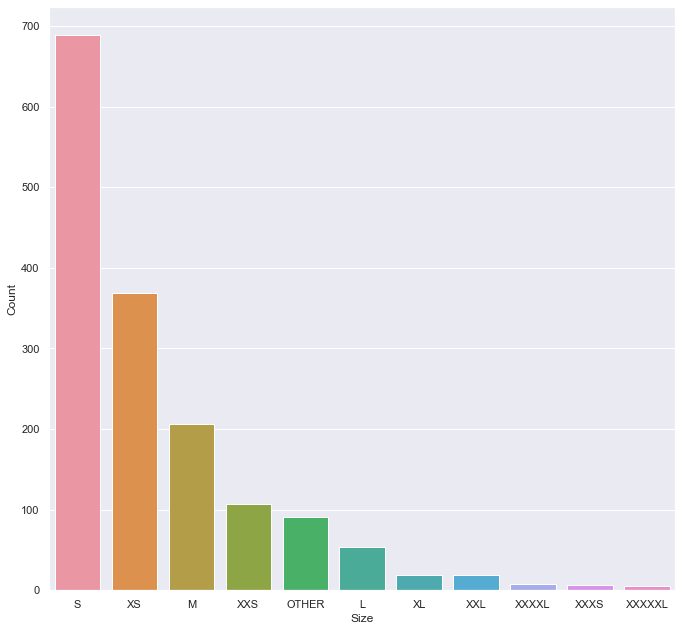

In [79]:
fig_dims = (10, 10)
sns.set(font_scale=1)
sns.color_palette("bright")

fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = wish['product_variation_size_id'].value_counts().index,
              data = wish,
              ax = ax)
ax.set(xlabel='Size', ylabel='Count')
plt.show()

# Product Variation Inventory
*Inventory the seller has. Max allowed quantity is 50*

In [80]:
wish['product_variation_inventory'].value_counts().head(10)

50    907
1     152
2      81
5      74
3      52
10     40
4      25
9      22
7      18
6      18
Name: product_variation_inventory, dtype: int64

In [81]:
wish['product_variation_inventory'].describe()

count   1573.00
mean      33.08
std       21.35
min        1.00
25%        6.00
50%       50.00
75%       50.00
max       50.00
Name: product_variation_inventory, dtype: float64

In [82]:
del wish['product_variation_inventory']

# Shipping Option Name
*french shipping quality option*

In [83]:
wish['shipping_option_name'].value_counts()

Livraison standard         1508
Standard Shipping            21
Envio Padrão                  9
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Standardowa wysyłka           3
Livraison Express             3
Standardversand               3
Стандартная доставка          3
Standart Gönderi              2
การส่งสินค้ามาตรฐาน           2
Spedizione standard           2
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Ekspresowa wysyłka            1
Name: shipping_option_name, dtype: int64

In [84]:
del wish['shipping_option_name']

# Shipping Option Price
*shipping price*

In [85]:
wish['shipping_option_price'].value_counts()

2     619
3     520
1     308
4      76
5      32
6      12
7       5
12      1
Name: shipping_option_price, dtype: int64

# Shipping Is Express
*whether the shipping is express or not. 1 for True.*

In [86]:
wish['shipping_is_express'].value_counts()

0    1569
1       4
Name: shipping_is_express, dtype: int64

# Countries Shipped To
*Number of countries this product is shipped to. Sellers may choose to limit where they ship a product to.*

In [87]:
wish['countries_shipped_to'].value_counts().head(10)

41    171
43    170
40    106
38     76
36     64
35     61
42     57
39     43
25     39
37     38
Name: countries_shipped_to, dtype: int64

In [88]:
wish['countries_shipped_to'].describe()

count   1573.00
mean      40.46
std       20.30
min        6.00
25%       31.00
50%       40.00
75%       43.00
max      140.00
Name: countries_shipped_to, dtype: float64

In [89]:
del wish['countries_shipped_to']

# Inventory Total
*Total inventory for all the product's variations (size/color variations for instance)

In [90]:
wish['inventory_total'].value_counts()

50    1563
2        2
40       1
38       1
37       1
36       1
30       1
24       1
9        1
1        1
Name: inventory_total, dtype: int64

In [91]:
del wish['inventory_total']

# Has Urgency Banner
*whether there was an urgency banner on the product.*

In [92]:
wish['has_urgency_banner'].value_counts()

1.00    473
Name: has_urgency_banner, dtype: int64

In [93]:
wish['has_urgency_banner'] = wish['has_urgency_banner'].replace(np.nan, 0)
wish['has_urgency_banner'].value_counts()

0.00    1100
1.00     473
Name: has_urgency_banner, dtype: int64

# Urgency Text
*A text banner that appear over some products in the search results.*

In [94]:
wish['urgency_text'].value_counts()

Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [95]:
del wish['urgency_text']

# Origin Country
*country where the products are coming from.*

In [96]:
wish['origin_country'].value_counts()

CN    1516
US      31
VE       5
SG       2
GB       1
AT       1
Name: origin_country, dtype: int64

In [97]:
def change_country(item):
    if item == 'VE':
        return 'Other'
    elif item == 'SG':
        return 'Other'
    elif item == 'AT':
        return 'Other'
    elif item == 'GB':
        return 'Other'
    else:
        return item

In [98]:
wish['origin_country'] = wish['origin_country'].apply(change_country)

In [99]:
wish['origin_country'].value_counts()

CN       1516
US         31
Other       9
Name: origin_country, dtype: int64

# Merchant Title
*Merchant's displayed name (show in the UI as the seller's shop name).*

In [100]:
wish['merchant_title'].head(10)

0                  zgrdejia
1                 SaraHouse
2                    hxt520
3                  allenfan
4           youngpeopleshop
5             zhoulinglinga
6    Unique Li Fashion Shop
7                   So Band
8           chenxiangjunjun
9             Luowei clothe
Name: merchant_title, dtype: object

# Merchant Name
*Merchant's canonical name. A name not shown publicly. Used by the website under the hood as a canonical name.*

In [101]:
wish['merchant_name'].head(10)

0                                             zgrdejia
1                                            sarahouse
2                                               hxt520
3                                             allenfan
4                                          happyhorses
5                                        zhoulinglinga
6    uniquelifashionshopbb657bfe91d211e598c7063a14d...
7                                               soband
8                                      chenxiangjunjun
9                                         luoweiclothe
Name: merchant_name, dtype: object

In [102]:
del wish['merchant_name']

In [103]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_price',
       'shipping_is_express', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_info_subtitle', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month', 'tag_quality', 'tag_count'],
      dtype='object')

# Merchant Info Subtitle
*The subtitle text as shown on a seller's info section to the user. (raw, not preprocessed). The website shows this to the user.*

In [104]:
wish['merchant_info_subtitle'].head(10)

0                          (568 notes)
1    83 % avis positifs (17,752 notes)
2       86 % avis positifs (295 notes)
3                       (23,832 notes)
4    85 % avis positifs (14,482 notes)
5        75 % avis positifs (65 notes)
6    86 % avis positifs (10,194 notes)
7                          (342 notes)
8       82 % avis positifs (330 notes)
9     85 % avis positifs (5,534 notes)
Name: merchant_info_subtitle, dtype: object

# Merchant Rating Count
*Number of ratings of this seller*

In [105]:
wish['merchant_rating_count'].describe()

count      1573.00
mean      26495.83
std       78474.46
min           0.00
25%        1987.00
50%        7936.00
75%       24564.00
max     2174765.00
Name: merchant_rating_count, dtype: float64

# Merchant Rating
*merchant's rating*

In [106]:
wish['merchant_rating'].describe()

count   1573.00
mean       4.03
std        0.20
min        2.33
25%        3.92
50%        4.04
75%        4.16
max        5.00
Name: merchant_rating, dtype: float64

# merchant_id
*merchant unique id*

In [107]:
wish['merchant_id'].head(5)

0    595097d6a26f6e070cb878d1
1    56458aa03a698c35c9050988
2    5d464a1ffdf7bc44ee933c65
3    58cfdefdacb37b556efdff7c
4    5ab3b592c3911a095ad5dadb
Name: merchant_id, dtype: object

# Merchant Has Profile Picture
*Convenience boolean that says whether there is a `merchant_profile_picture` url*

In [108]:
wish['merchant_has_profile_picture'].value_counts()

0    1347
1     226
Name: merchant_has_profile_picture, dtype: int64

In [109]:
wish['merchant_profile_picture'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: merchant_profile_picture, dtype: object

In [110]:
del wish['merchant_profile_picture']

# Product Url
*url to the product page. You may need to login to access it*

In [111]:
wish['product_url'].head()

0    https://www.wish.com/c/5e9ae51d43d6a96e303acdb0
1    https://www.wish.com/c/58940d436a0d3d5da4e95a38
2    https://www.wish.com/c/5ea10e2c617580260d55310a
3    https://www.wish.com/c/5cedf17ad1d44c52c59e4aca
4    https://www.wish.com/c/5ebf5819ebac372b070b0e70
Name: product_url, dtype: object

In [112]:
del wish['product_url']

In [113]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_price',
       'shipping_is_express', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_info_subtitle', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
       'product_picture', 'product_id', 'theme', 'crawl_month', 'tag_quality',
       'tag_count'],
      dtype='object')

# Product Picture
*actual picture of the product*

In [114]:
wish['product_picture'].head()

0    https://contestimg.wish.com/api/webimage/5e9ae...
1    https://contestimg.wish.com/api/webimage/58940...
2    https://contestimg.wish.com/api/webimage/5ea10...
3    https://contestimg.wish.com/api/webimage/5cedf...
4    https://contestimg.wish.com/api/webimage/5ebf5...
Name: product_picture, dtype: object

# Product Id
*product identifier. You can use this key to remove duplicate entries if you're not interested in studying them.*

In [115]:
wish['product_id'].head()

0    5e9ae51d43d6a96e303acdb0
1    58940d436a0d3d5da4e95a38
2    5ea10e2c617580260d55310a
3    5cedf17ad1d44c52c59e4aca
4    5ebf5819ebac372b070b0e70
Name: product_id, dtype: object

# Theme
*the search term used in the search bar of the website to get these search results.*

In [116]:
wish['theme'].value_counts()

summer    1573
Name: theme, dtype: int64

In [117]:
del wish['theme']

In [118]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_price',
       'shipping_is_express', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_info_subtitle', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
       'product_picture', 'product_id', 'crawl_month', 'tag_quality',
       'tag_count'],
      dtype='object')

# Crawl Month
*meta: for info only*

In [119]:
wish['crawl_month'].value_counts()

2020-08    1573
Name: crawl_month, dtype: int64

In [120]:
del wish['crawl_month']

In [121]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_price',
       'shipping_is_express', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_info_subtitle', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
       'product_picture', 'product_id', 'tag_quality', 'tag_count'],
      dtype='object')

# Creating New Columns 

In [122]:
def positive_per(words):
    pos_ses = 'avis positifs'
    if f'{pos_ses}' in f'{words}':
        return 1
    else:
        return 0
    
wish['subtitle_rating'] = wish['merchant_info_subtitle'].apply(positive_per)

In [123]:
wish['subtitle_rating'].head(10)

0    0
1    1
2    1
3    0
4    1
5    1
6    1
7    0
8    1
9    1
Name: subtitle_rating, dtype: int64

In [124]:
wish['subtitle_rating'].value_counts()

1    1225
0     348
Name: subtitle_rating, dtype: int64

*Creating a new column which will tell me if the title and title_orig are the same.*

In [125]:
def is_trans(trans,origi):
    if trans == origi:
        return 0
    else:
        return 1
    
wish['title_translated'] = wish.apply(lambda x: is_trans(x.title, x.title_orig), axis=1 ) 

In [126]:
wish['title_translated'].head()

0    0
1    1
2    1
3    1
4    1
Name: title_translated, dtype: int64

In [127]:
wish['title_translated'].value_counts()

1    1419
0     154
Name: title_translated, dtype: int64

*Created a new column to have a percentage of how many 5,4,3,2,1 star ratings* 

In [128]:
# def rating_percent(s_count,t_count):
#     if s_count == 0:
#         return 0
#     else:
#         return s_count/t_count * 100
    
# wish['rating_five_percent'] = wish.apply(lambda x: rating_percent(x.rating_five_count, x.rating_count), axis = 1)
# wish['rating_four_percent'] = wish.apply(lambda x: rating_percent(x.rating_four_count, x.rating_count), axis = 1)
# wish['rating_three_percent'] = wish.apply(lambda x: rating_percent(x.rating_three_count, x.rating_count), axis = 1)
# wish['rating_two_percent'] = wish.apply(lambda x: rating_percent(x.rating_two_count, x.rating_count), axis = 1)
# wish['rating_one_percent'] = wish.apply(lambda x: rating_percent(x.rating_one_count, x.rating_count), axis = 1)

In [129]:
wish.head(10)

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_price,shipping_is_express,has_urgency_banner,origin_country,merchant_title,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_picture,product_id,tag_quality,tag_count,subtitle_rating,title_translated
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.00,8.00,10.00,1.00,9.00,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,4,0,1.00,CN,zgrdejia,(568 notes),568,4.13,595097d6a26f6e070cb878d1,0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,0.70,24,0,0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.00,1027.00,1118.00,644.00,1077.00,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,2,0,1.00,CN,SaraHouse,"83 % avis positifs (17,752 notes)",17752,3.90,56458aa03a698c35c9050988,0,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,0.50,15,1,1
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.00,4.00,2.00,0.00,3.00,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,3,0,1.00,CN,hxt520,86 % avis positifs (295 notes),295,3.99,5d464a1ffdf7bc44ee933c65,0,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,0.30,19,1,1
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.00,119.00,87.00,42.00,36.00,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,2,0,0.00,CN,allenfan,"(23,832 notes)",23832,4.02,58cfdefdacb37b556efdff7c,0,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,0.60,18,0,1
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.00,4.00,2.00,2.00,6.00,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,0,1.00,CN,youngpeopleshop,"85 % avis positifs (14,482 notes)",14482,4.00,5ab3b592c3911a095ad5dadb,0,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,0.60,13,1,1
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1,1.00,0.00,0.00,0.00,0.00,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",blue,XS,1,0,0.00,CN,zhoulinglinga,75 % avis positifs (65 notes),65,3.51,5e4b9c3801ba9d210036fc5a,0,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,0.60,10,1,1
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,50000,0,3.84,6742,3172.00,1352.00,971.00,490.00,757.00,0,0,0,0,"blouse,Women,lace t shirt,summer t-shirts,Lace...",white,XS,2,0,0.00,CN,Unique Li Fashion Shop,"86 % avis positifs (10,194 notes)",10194,4.08,5652f4053a698c76dc9a3f37,1,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf,0.50,21,1,1
7,Robe tunique ample femme Robe d'été Robe en je...,Women's Baggy Tunic Dress Summer Dress Denim D...,12.00,11,1000,0,3.76,286,120.00,56.00,61.00,18.00,31.00,0,0,0,0,"Jeans,Fashion,tunic,Shirt,Summer,Dress,Denim,s...",blue,M,3,0,0.00,CN,So Band,(342 notes),342,3.68,5d45349676befe65691dcfbb,0,https://contestimg.wish.com/api/webimage/5e0ae...,5e0ae5ebc2efb76ccf0a3391,0.40,16,0,1
8,Robe d'été décontractée à manches courtes pour...,Women's Summer Casual Dress Fashion Short Slee...,11.00,84,100,1,3.47,15,6.00,2.00,3.00,1.00,3.00,0,0,0,0,"slim dress,summer dress,womenshortsleevedre,Sl...",black,M,2,0,1.00,CN,chenxiangjunjun,82

*Created a new column which shows me the discount rate between retail price and the customer price*

In [130]:
def discount(r_price,buyer_price):
    return r_price - buyer_price
    
wish['discount_amount'] = wish.apply(lambda x: discount(x.retail_price, x.price),axis = 1)

In [131]:
wish['discount_amount'].head(5)

0   -2.00
1   14.00
2   35.00
3    0.00
4    0.28
Name: discount_amount, dtype: float64

In [132]:
wish['discount_amount'].value_counts().head(10)

-1.00    414
0.00     193
-2.00     88
1.00      37
2.00      36
5.00      20
3.00      19
9.00      19
11.00     15
6.00      13
Name: discount_amount, dtype: int64

In [133]:
def revenue(price, units_sold):
    return price * units_sold
    
wish['revenue'] = wish.apply(lambda x: revenue(x.price, x.units_sold),axis = 1)

In [134]:
wish['revenue'].head(10)

0     1600.00
1   160000.00
2      800.00
3    40000.00
4      272.00
5       39.20
6   350000.00
7    12000.00
8     1100.00
9    28900.00
Name: revenue, dtype: float64

In [135]:
wish['revenue'].describe()

count     1573.00
mean     35211.94
std      72649.67
min         20.00
25%        800.00
50%       7000.00
75%      40000.00
max     800000.00
Name: revenue, dtype: float64

In [136]:
wish.head(20)

,title,title_orig,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,product_color,product_variation_size_id,shipping_option_price,shipping_is_express,has_urgency_banner,origin_country,merchant_title,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,product_picture,product_id,tag_quality,tag_count,subtitle_rating,title_translated,discount_amount,revenue
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,0,3.76,54,26.00,8.00,10.00,1.00,9.00,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",white,M,4,0,1.00,CN,zgrdejia,(568 notes),568,4.13,595097d6a26f6e070cb878d1,0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,0.70,24,0,0,-2.00,1600.00
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,20000,1,3.45,6135,2269.00,1027.00,1118.00,644.00,1077.00,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",green,XS,2,0,1.00,CN,SaraHouse,"83 % avis positifs (17,752 notes)",17752,3.90,56458aa03a698c35c9050988,0,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,0.50,15,1,1,14.00,160000.00
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,100,0,3.57,14,5.00,4.00,2.00,0.00,3.00,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",leopardprint,XS,3,0,1.00,CN,hxt520,86 % avis positifs (295 notes),295,3.99,5d464a1ffdf7bc44ee933c65,0,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,0.30,19,1,1,35.00,800.00
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,5000,1,4.03,579,295.00,119.00,87.00,42.00,36.00,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",black,M,2,0,0.00,CN,allenfan,"(23,832 notes)",23832,4.02,58cfdefdacb37b556efdff7c,0,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,0.60,18,0,1,0.00,40000.00
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,100,1,3.10,20,6.00,4.00,2.00,2.00,6.00,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",yellow,S,1,0,1.00,CN,youngpeopleshop,"85 % avis positifs (14,482 notes)",14482,4.00,5ab3b592c3911a095ad5dadb,0,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,0.60,13,1,1,0.28,272.00
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,3.92,9,10,0,5.00,1,1.00,0.00,0.00,0.00,0.00,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",blue,XS,1,0,0.00,CN,zhoulinglinga,75 % avis positifs (65 notes),65,3.51,5e4b9c3801ba9d210036fc5a,0,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54,0.60,10,1,1,5.08,39.20
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,7.00,6,50000,0,3.84,6742,3172.00,1352.00,971.00,490.00,757.00,0,0,0,0,"blouse,Women,lace t shirt,summer t-shirts,Lace...",white,XS,2,0,0.00,CN,Unique Li Fashion Shop,"86 % avis positifs (10,194 notes)",10194,4.08,5652f4053a698c76dc9a3f37,1,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf,0.50,21,1,1,-1.00,350000.00
7,Robe tunique ample femme Robe d'été Robe en je...,Women's Baggy Tunic Dress Summer Dress Denim D...,12.00,11,1000,0,3.76,286,120.00,56.00,61.00,18.00,31.00,0,0,0,0,"Jeans,Fashion,tunic,Shirt,Summer,Dress,Denim,s...",blue,M,3,0,0.00,CN,So Band,(342 notes),342,3.68,5d45349676befe65691dcfbb,0,https://contestimg.wish.com/api/webimage/5e0ae...,5e0ae5ebc2efb76ccf0a3391,0.40,16,0,1,-1.00,12000.00
8,Robe d'été décontractée à manches courtes pour...,Women's Summer Casual Dress Fashion Short Slee...,11.00,84,10

*A simple function to create a new label 'is_successful':*

In [137]:
def is_successful(units_sold):
    if units_sold > 1000:
        return 1
    else:
        return 0

In [138]:
wish['is_successful'] = wish['units_sold'].apply(is_successful)

In [139]:
wish.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'rating_five_count',
       'rating_four_count', 'rating_three_count', 'rating_two_count',
       'rating_one_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags', 'product_color',
       'product_variation_size_id', 'shipping_option_price',
       'shipping_is_express', 'has_urgency_banner', 'origin_country',
       'merchant_title', 'merchant_info_subtitle', 'merchant_rating_count',
       'merchant_rating', 'merchant_id', 'merchant_has_profile_picture',
       'product_picture', 'product_id', 'tag_quality', 'tag_count',
       'subtitle_rating', 'title_translated', 'discount_amount', 'revenue',
       'is_successful'],
      dtype='object')

In [140]:
wish = wish[['title', 'title_orig','title_translated','price','retail_price','discount_amount','units_sold','revenue','is_successful','uses_ad_boosts',
              'rating','rating_count','rating_five_count','rating_four_count','rating_three_count','rating_two_count','rating_one_count',
              'badges_count','badge_local_product','badge_product_quality','badge_fast_shipping',
              'tags','tag_count','tag_quality','product_color','product_variation_size_id','shipping_option_price','shipping_is_express',
              'has_urgency_banner','origin_country','merchant_title','merchant_id','merchant_info_subtitle','subtitle_rating','merchant_rating',
              'merchant_rating_count','merchant_has_profile_picture','product_picture','product_id']]

In [141]:
wish.head(20)

,title,title_orig,title_translated,price,retail_price,discount_amount,units_sold,revenue,is_successful,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,tags,tag_count,tag_quality,product_color,product_variation_size_id,shipping_option_price,shipping_is_express,has_urgency_banner,origin_country,merchant_title,merchant_id,merchant_info_subtitle,subtitle_rating,merchant_rating,merchant_rating_count,merchant_has_profile_picture,product_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,0,16.00,14,-2.00,100,1600.00,0,0,3.76,54,26.00,8.00,10.00,1.00,9.00,0,0,0,0,"Summer,Fashion,womenunderwearsuit,printedpajam...",24,0.70,white,M,4,0,1.00,CN,zgrdejia,595097d6a26f6e070cb878d1,(568 notes),0,4.13,568,0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,1,8.00,22,14.00,20000,160000.00,1,1,3.45,6135,2269.00,1027.00,1118.00,644.00,1077.00,0,0,0,0,"Mini,womens dresses,Summer,Patchwork,fashion d...",15,0.50,green,XS,2,0,1.00,CN,SaraHouse,56458aa03a698c35c9050988,"83 % avis positifs (17,752 notes)",1,3.90,17752,0,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,1,8.00,43,35.00,100,800.00,0,0,3.57,14,5.00,4.00,2.00,0.00,3.00,0,0,0,0,"Summer,cardigan,women beachwear,chiffon,Sexy w...",19,0.30,leopardprint,XS,3,0,1.00,CN,hxt520,5d464a1ffdf7bc44ee933c65,86 % avis positifs (295 notes),1,3.99,295,0,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,1,8.00,8,0.00,5000,40000.00,1,1,4.03,579,295.00,119.00,87.00,42.00,36.00,0,0,0,0,"Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...",18,0.60,black,M,2,0,0.00,CN,allenfan,58cfdefdacb37b556efdff7c,"(23,832 notes)",0,4.02,23832,0,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,1,2.72,3,0.28,100,272.00,0,1,3.10,20,6.00,4.00,2.00,2.00,6.00,0,0,0,0,"Summer,Plus Size,Lace,Casual pants,Bottom,pant...",13,0.60,yellow,S,1,0,1.00,CN,youngpeopleshop,5ab3b592c3911a095ad5dadb,"85 % avis positifs (14,482 notes)",1,4.00,14482,0,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70
5,Plus la taille d'été femmes décontracté sans m...,Plus Size Summer Women Casual Sleeveless Rompe...,1,3.92,9,5.08,10,39.20,0,0,5.00,1,1.00,0.00,0.00,0.00,0.00,0,0,0,0,"Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...",10,0.60,blue,XS,1,0,0.00,CN,zhoulinglinga,5e4b9c3801ba9d210036fc5a,75 % avis positifs (65 notes),1,3.51,65,0,https://contestimg.wish.com/api/webimage/5ec64...,5ec645bafd107a02279c8c54
6,Women Fashion Loose Lace Blouse Blouse V Neck ...,Women Fashion Loose Lace Blouse V Neck Bat Sle...,1,7.00,6,-1.00,50000,350000.00,1,0,3.84,6742,3172.00,1352.00,971.00,490.00,757.00,0,0,0,0,"blouse,Women,lace t shirt,summer t-shirts,Lace...",21,0.50,white,XS,2,0,0.00,CN,Unique Li Fashion Shop,5652f4053a698c76dc9a3f37,"86 % avis positifs (10,194 notes)",1,4.08,10194,1,https://contestimg.wish.com/api/webimage/5c63a...,5c63a337d5e2ce4bbb3152cf
7,Robe tunique ample femme Robe d'été Robe en je...,Women's Baggy Tunic Dress Summer Dress Denim D...,1,12.00,11,-1.00,1000,12000.00,0,0,3.76,286,120.00,56.00,61.00,18.00,31.00,0,0,0,0,"Jeans,Fashion,tunic,Shirt,Summer,Dress,Denim,s...",16,0.40,blue,M,3,0,0.00,CN,So Band,5d45349676befe65691dcfbb,(342 notes),0,3.68,342,0,https://contestimg.wish.com/api/webimage/5e0ae...,5e0ae5ebc2efb76ccf0a3391
8,Robe d'été décontractée à manches courtes pour...,Women's Summer Casual Dress Fas

In [142]:
wish['is_successful'].value_counts()

0    1053
1     520
Name: is_successful, dtype: int64

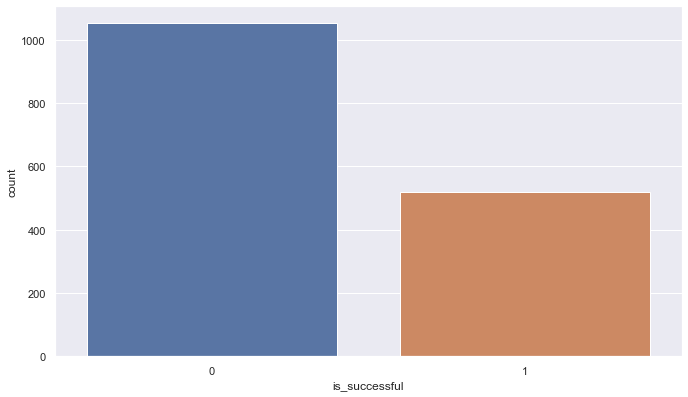

Percent of successful products:  33.057851239669425


In [143]:
sns.countplot(data=wish, x='is_successful')
plt.show()

print('Percent of successful products: ', wish['is_successful'].value_counts()[1] / len(wish['is_successful'])*100)

# Does the use of ad boosts increase success
*There is an almost equal use of ad boosts by the products.*

In [144]:
print('Percent of products using ad boosts: ', wish['uses_ad_boosts'].value_counts()[1] / len(wish['uses_ad_boosts'])*100)


Percent of products using ad boosts:  43.293070565797834


<AxesSubplot:xlabel='uses_ad_boosts', ylabel='count'>

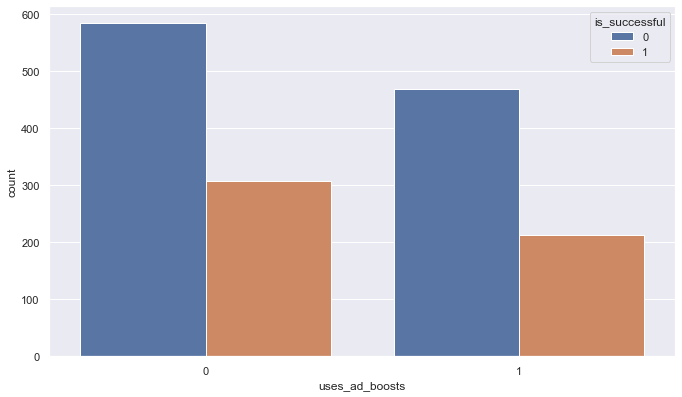

In [145]:
sns.countplot(data=wish, x='uses_ad_boosts', hue='is_successful')

In [146]:
pd.crosstab(wish['uses_ad_boosts'], wish['is_successful'])

is_successful,0,1
uses_ad_boosts,,
0,584,308
1,469,212


In [147]:
pd.crosstab(wish['uses_ad_boosts'], wish['units_sold'])

units_sold,10,50,100,1000,5000,10000,20000,50000,100000
uses_ad_boosts,,,,,,,,,
0,51,50,265,218,134,104,54,13,3
1,12,26,244,187,83,73,49,4,3


*It seems like ad boosts do not have any impact on units sold.. perhaps something I am missing here? I mean, there must be some benefit of the addition cost(?) for the ad boosts.*

*The website needs to consider the effectiveness of this, otherwise the merchants may simply not use it and the website might lose this additional income.*

In [148]:
ratings_column = ['rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count']

wish.groupby('is_successful').mean()[ratings_column]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
is_successful,,,,,,,
0,3.80,124.36,62.52,25.22,18.64,9.09,15.96
1,3.86,2439.39,1179.81,479.41,359.70,169.76,250.72


In [149]:
wish.groupby('units_sold').mean()[ratings_column]

,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
units_sold,,,,,,,
10,4.32,1.51,40.71,16.32,12.37,5.78,10.40
50,3.88,5.32,6.88,2.66,1.88,1.01,1.59
100,3.73,33.35,16.63,6.96,5.15,2.61,4.92
1000,3.80,280.19,134.02,53.78,39.71,19.27,33.40
5000,3.82,872.45,416.86,166.47,126.01,61.57,101.54
10000,3.90,1869.94,931.55,369.58,262.29,121.31,185.20
20000,3.87,4581.16,2197.57,905.29,682.86,322.24,473.18
50000,3.90,10731.94,5216.76,2104.88,1614.06,762.35,1033.88
100000,3.84,15646.83,7187.17,3120.50,2583.50,1215.00,1540.67


*Successful products have more ratings. This is expected as units sold is higher so rating is also higher. However, if I am building a model, I don't think it would be a good idea to keep this column as the huge number of ratings must be the result of higher units sold.*

In [150]:
badges_column = ['badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping']

In [153]:
from wordcloud import WordCloud, STOPWORDS

wish['tags'].head(10)

0    Summer,Fashion,womenunderwearsuit,printedpajam...
1    Mini,womens dresses,Summer,Patchwork,fashion d...
2    Summer,cardigan,women beachwear,chiffon,Sexy w...
3    Summer,Shorts,Cotton,Cotton T Shirt,Sleeve,pri...
4    Summer,Plus Size,Lace,Casual pants,Bottom,pant...
5    Deep V-Neck,Summer,Plus Size,Spaghetti Strap,O...
6    blouse,Women,lace t shirt,summer t-shirts,Lace...
7    Jeans,Fashion,tunic,Shirt,Summer,Dress,Denim,s...
8    slim dress,summer dress,womenshortsleevedre,Sl...
9    blouse,Summer,Plus Size,Floral print,Necks,Sle...
Name: tags, dtype: object

In [156]:
def remove_stopwords(text):
    from nltk.tokenize import word_tokenize

    text_tokens = word_tokenize(text)

    tokens_without_sw = [word for word in text_tokens if not word in STOPWORDS]
    
    filtered_sentence = (" ").join(tokens_without_sw)

    return filtered_sentence

In [157]:
wish['tags_mod'] = wish['tags'].apply(remove_stopwords)

In [159]:
from collections import Counter
results = Counter()
wish['tags_mod'].str.lower().str.split().apply(results.update)
counter_df = pd.DataFrame.from_dict(results, orient='index')
counter_df.sort_values(by=0, axis=0, ascending=False).head(15)

,0
",",25750
women,3323
fashion,2807
dress,2719
summer,1872
's,1462
casual,1221
tops,835
sleeveless,835
shorts,744


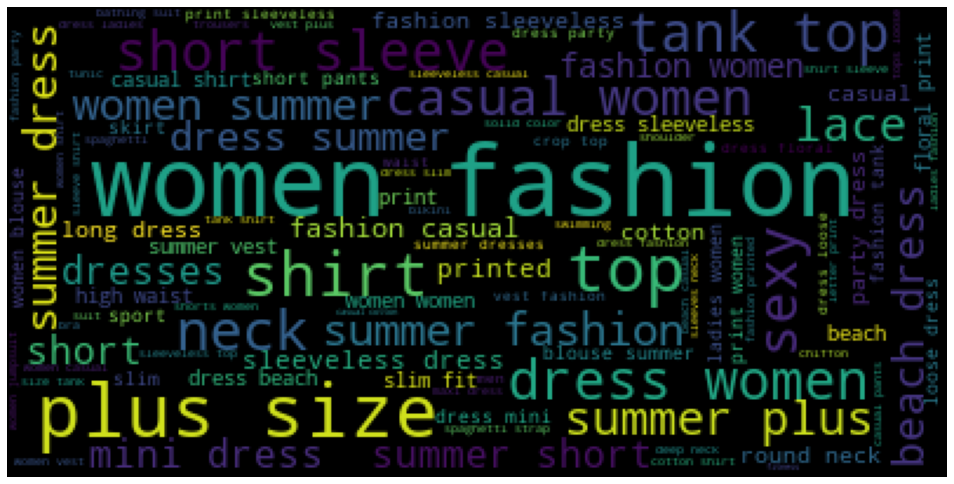

In [160]:
# import matplotlib.pyplot as plt
word_string=" ".join(wish['tags_mod'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

*Most of the tags seems to be related to female's clothing. How about be compare the tags of successful and unsuccessful products.*

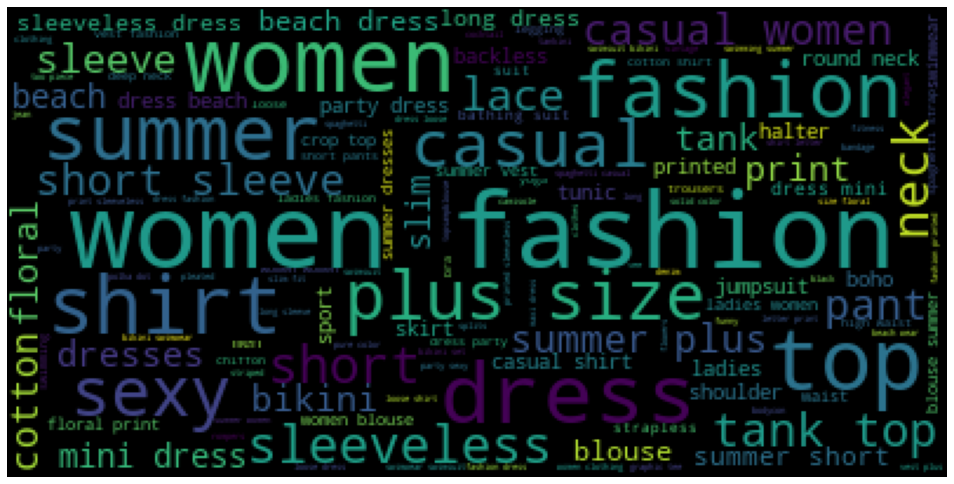

In [161]:
word_string=" ".join(wish[wish['is_successful']==1]['tags_mod'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

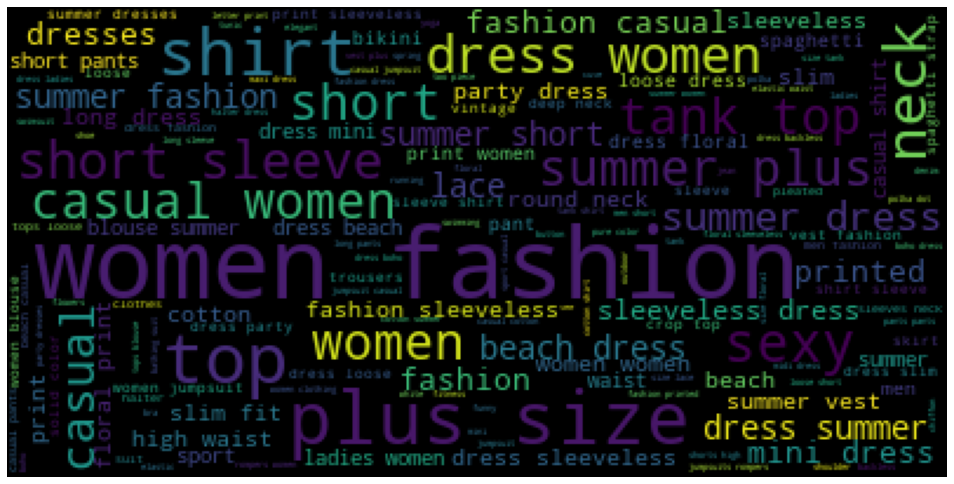

In [162]:
word_string=" ".join(wish[wish['is_successful']==0]['tags'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [169]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

<AxesSubplot:xlabel='uses_ad_boosts', ylabel='units_sold'>

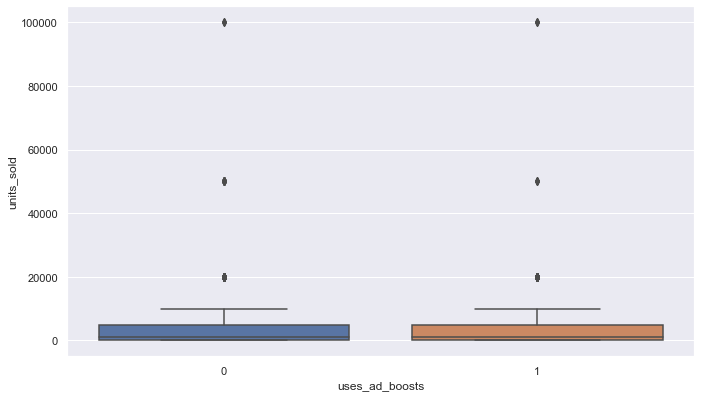

In [164]:
sns.boxplot('uses_ad_boosts', 'units_sold', data=wish)

In [165]:
wish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   title_translated              1573 non-null   int64  
 3   price                         1573 non-null   float64
 4   retail_price                  1573 non-null   int64  
 5   discount_amount               1573 non-null   float64
 6   units_sold                    1573 non-null   int64  
 7   revenue                       1573 non-null   float64
 8   is_successful                 1573 non-null   int64  
 9   uses_ad_boosts                1573 non-null   int64  
 10  rating                        1573 non-null   float64
 11  rating_count                  1573 non-null   int64  
 12  rating_five_count             1573 non-null   float64
 13  rat

In [166]:
wish['title_translated'] = wish['title_translated'].astype('category',copy=False)
wish['is_successful'] = wish['is_successful'].astype('category',copy=False)
wish['uses_ad_boosts'] = wish['uses_ad_boosts'].astype('category',copy=False)
wish['badge_local_product'] = wish['badge_local_product'].astype('category',copy=False)
wish['has_urgency_banner'] = wish['has_urgency_banner'].astype('category',copy=False)

In [178]:
formula = 'revenue ~ discount_amount + C(badge_local_product) +C(uses_ad_boosts) + C(has_urgency_banner)'

In [179]:
train, test = statsmodels_train_test_split(wish)

In [180]:
model = smf.ols(formula = formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.076
Date:                Mon, 21 Sep 2020   Prob (F-statistic):              0.367
Time:                        15:58:11   Log-Likelihood:                -14876.
No. Observations:                1179   AIC:                         2.976e+04
Df Residuals:                    1174   BIC:                         2.979e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     3.291e+04   3318.167      9.917      0.000    2.64e+04    3.94e+04
C(badge_local_product)[T.1]   -677.2852   1.65e+04     -0.041      0.967   -3.31e+04    3.17e+04
C(uses_ad_boosts)[T.1]        1758.3346   4324.239      0.407      0.684   -6725.764    1.02e+04
C(has_urgency_banner)[T.1.0]  -984.8895   4652.367     -0.212      0.832   -1.01e+04    8142.992
discount_amount                145.9280     71.705      2.035      0.042       5.243     286.613
==============================================================================
Omnibus:                     1103.048   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41942.226
Skew:                           4.357   Prob(JB):                         0.00
Kurtosis:                      30.890   Cond. No.                         259.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [152]:
# wish.to_csv('wish_final.csv',index=False)